## svm machine learning model for recipe recognition

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv('cleaned_posts.csv')
df.head()

,Post Text,Cooking Verbs,tfidf_sum,bigram_sum,Post Length,is_recipe
0,csoak saffron in warm milk for 5 minutes and p...,8,2.394449,172,1050,1
1,cinto a 1 quart jar with tight fitting lid put...,2,1.413113,68,364,1
2,cdrain the tofu carefully squeezing out excess...,10,2.049659,213,1414,1
3,cmix everything together and bring to a boil r...,1,1.000000,30,180,1
4,cgraham cracker crust in small bowl combine gr...,7,1.319044,181,1307,1


### 1. Data Preparation

In [2]:
# Prepare the feature columns and target column
feature_cols = ['Cooking Verbs', 'tfidf_sum', 'bigram_sum', 'Post Length']
X = df[feature_cols]
y = df['is_recipe']

### 2. Data Splitting

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. Model Training

In [4]:
# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

### 4. Model Evaluation

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [6]:
# Calculate and print the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(confusion_matrix_result)

[[12  0]
 [ 1  7]]


### 5. Confusion Matrix Plotting

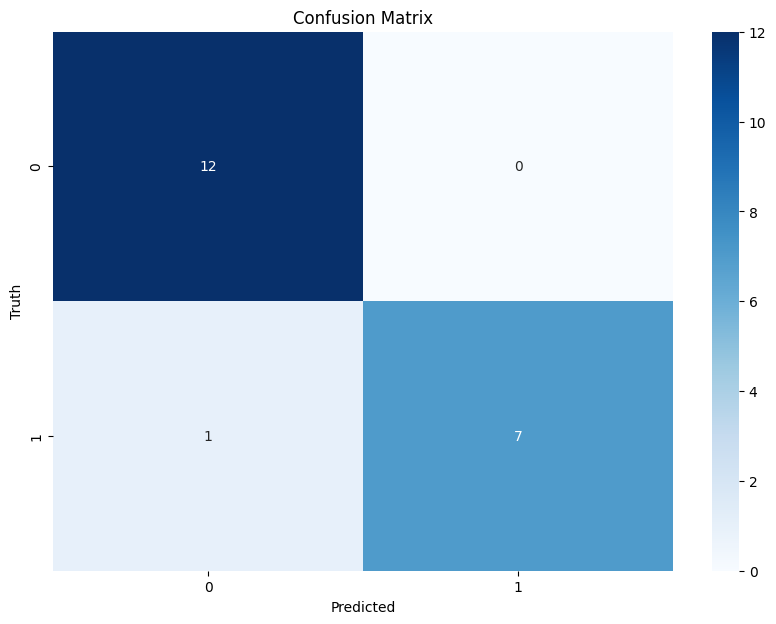

In [7]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [10]:
import joblib

# Save the model
joblib.dump(model, 'svm_model1.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler1.pkl')


['scaler1.pkl']